# Die ROC-Curve - Beurteilung binärer Classifier
### Einführungsbeispiel

Das Modell sagt: [False False  True False  True  True  True  True  True  True]
Tatsächlich:     [False False False False False  True  True  True  True  True]


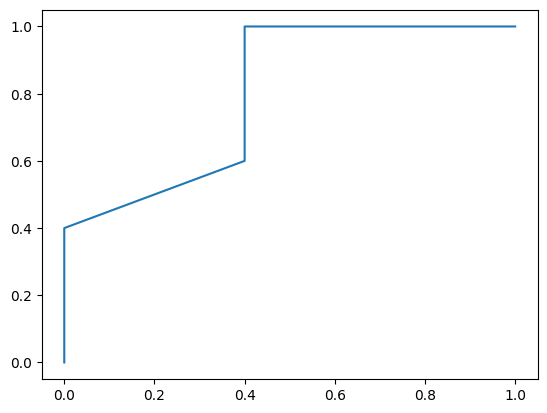

In [46]:
import numpy as np
from sklearn import metrics
#Die tatsächliche Klassenzugehörigkeit (also 0 oder 1) ist hier wiedergegeben:
y = np.array([0,0,0,0,0,1,1,1,1,1]) 
# Gegeben seien Vorhersagen eines Modells: 0.5 sei die Entscheidungsgrenze: 
scores = np.array([0.45, 0.43, 0.55, 0.45, 0.55, 0.55, 0.6, 0.52, 0.51, 0.6])
y_test_pred = (scores >= 0.5)
print('Das Modell sagt: ' + str(y_test_pred))
print('Tatsächlich:     ' + str(y == 1))
# ...um 0.5 herum gibt es also FP's und FN's, was mit der ROC-Curve gezeigt wird:
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=1)
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.show()

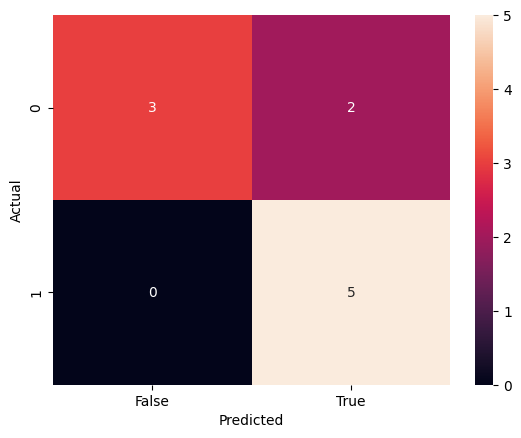

In [47]:
import pandas as pd
# Schöner in Seaborn.....
import seaborn as sn
import matplotlib.pyplot as plt
# y: tatsächlich              
conf_mat = pd.crosstab(y, y_test_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True)
plt.show()

### Die ROC-Curve an einem Beispiel-Modell

In [48]:
import pandas as pd

df = pd.read_csv("../classification.csv")

# Wenn du ein paar Spalten vorab aus den Daten entfernen
# df = df.drop("Spaltenname", axis = 1)

# Wenn du eine kategorische Variable in mehrere Spalten umwandeln
# möchtest, kannst du das mit folgendem Code tun:
# df = pd.get_dummies(df, columns = ["Spaltenname"])

df.size

891

In [49]:
from sklearn.model_selection import train_test_split

# Welche Spalten sollen zur Vorhersage verwendet werden
X = df[["age", "interest"]].values

# Oder: Die Spalte "success" soll nicht zur Vorhersage verwendet werden:
# X = df.drop("success", axis = 1).values

y = df["success"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

In [50]:
### Achtung!!! - Entweder Naiver-Bayes oder....
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.8933333333333333


In [51]:
### Achtung!!! - ....oder Logistic Regression ausführen...
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.88


In [52]:
y_pred = model.predict(X_test)
# das liefert aber nur 0en und 1en
y_pred

array([1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 1.])

In [53]:
#predict_proba() liefert nun Wahrscheinlichkeitswerte
#[....[Wahrscheinlichkeit0,  Wahrscheinlichkeit1], ....]
model.predict_proba(X_test)

array([[1.25595404e-02, 9.87440460e-01],
       [6.10380649e-01, 3.89619351e-01],
       [9.72533933e-01, 2.74660672e-02],
       [1.98448261e-01, 8.01551739e-01],
       [6.40542186e-03, 9.93594578e-01],
       [9.75421957e-01, 2.45780428e-02],
       [8.74018975e-01, 1.25981025e-01],
       [6.83273872e-03, 9.93167261e-01],
       [7.78860916e-04, 9.99221139e-01],
       [1.70143558e-01, 8.29856442e-01],
       [4.45445307e-01, 5.54554693e-01],
       [6.47658355e-02, 9.35234165e-01],
       [9.11798657e-01, 8.82013432e-02],
       [1.23242768e-02, 9.87675723e-01],
       [3.38135697e-04, 9.99661864e-01],
       [6.73062376e-03, 9.93269376e-01],
       [8.32996118e-01, 1.67003882e-01],
       [9.77459935e-01, 2.25400651e-02],
       [8.32317782e-01, 1.67682218e-01],
       [3.76675892e-02, 9.62332411e-01],
       [9.40378787e-02, 9.05962121e-01],
       [2.87091972e-03, 9.97129080e-01],
       [8.38361290e-01, 1.61638710e-01],
       [1.95131930e-01, 8.04868070e-01],
       [7.680213

In [54]:

y_test_pred = model.predict_proba(X_test)[:, 1]

In [55]:
y_test_pred

array([0.98744046, 0.38961935, 0.02746607, 0.80155174, 0.99359458,
       0.02457804, 0.12598102, 0.99316726, 0.99922114, 0.82985644,
       0.55455469, 0.93523416, 0.08820134, 0.98767572, 0.99966186,
       0.99326938, 0.16700388, 0.02254007, 0.16768222, 0.96233241,
       0.90596212, 0.99712908, 0.16163871, 0.80486807, 0.23197861,
       0.31025256, 0.75372274, 0.3206223 , 0.99858068, 0.98892516,
       0.18419525, 0.53240205, 0.22618327, 0.08665858, 0.84436194,
       0.99422811, 0.05491354, 0.52369733, 0.33323199, 0.99444932,
       0.25713584, 0.00479873, 0.76510381, 0.97449642, 0.97667791,
       0.98152418, 0.9502005 , 0.85199195, 0.40211746, 0.98576981,
       0.57207997, 0.91448549, 0.99084593, 0.052976  , 0.94877052,
       0.22054603, 0.54145025, 0.99843439, 0.33833879, 0.0027428 ,
       0.00220566, 0.03523089, 0.87421332, 0.59768826, 0.64930348,
       0.16478999, 0.98828203, 0.31749066, 0.98436413, 0.99410116,
       0.04219459, 0.67871719, 0.00186562, 0.95510473, 0.97049

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred, pos_label=1)


In [57]:
fpr

array([0.        , 0.        , 0.        , 0.02702703, 0.02702703,
       0.05405405, 0.05405405, 0.08108108, 0.08108108, 0.10810811,
       0.10810811, 0.21621622, 0.21621622, 0.37837838, 0.37837838,
       1.        ])

In [58]:
tpr

array([0.        , 0.02631579, 0.57894737, 0.57894737, 0.60526316,
       0.60526316, 0.81578947, 0.81578947, 0.89473684, 0.89473684,
       0.94736842, 0.94736842, 0.97368421, 0.97368421, 1.        ,
       1.        ])

In [59]:
thresholds

array([       inf, 0.99966186, 0.97049149, 0.96233241, 0.95510473,
       0.9502005 , 0.82985644, 0.80486807, 0.75372274, 0.67871719,
       0.59768826, 0.53240205, 0.52369733, 0.31749066, 0.31025256,
       0.00186562])

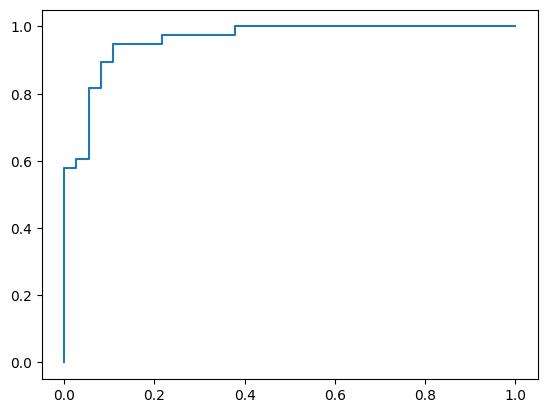

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.show()

In [61]:
roc_auc_score(y_test, y_test_pred)

0.9601706970128023

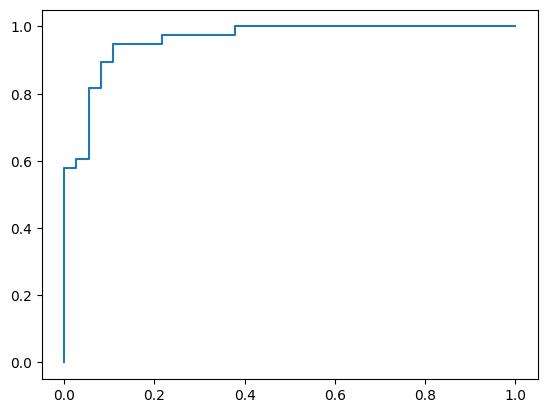

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.show()

In [63]:
roc_auc_score(y_test, y_test_pred)

0.9601706970128023

In [64]:
metrics.roc_curve?

Signature:
metrics.roc_curve(
    y_true,
    y_score,
    *,
    pos_label=None,
    sample_weight=None,
    drop_intermediate=True,
)
Docstring:
Compute Receiver operating characteristic (ROC).

Note: this implementation is restricted to the binary classification task.

Read more in the :ref:`User Guide <roc_metrics>`.

Parameters
----------
y_true : array-like of shape (n_samples,)
    True binary labels. If labels are not either {-1, 1} or {0, 1}, then
    pos_label should be explicitly given.

y_score : array-like of shape (n_samples,)
    Target scores, can either be probability estimates of the positive
    class, confidence values, or non-thresholded measure of decisions
    (as returned by "decision_function" on some classifiers).

pos_label : int, float, bool or str, default=None
    The label of the positive class.
    When ``pos_label=None``, if `y_true` is in {-1, 1} or {0, 1},
    ``pos_label`` is set to 1, otherwise an error will be raised.

sample_weight : array-like of

### Die Veranschaulichung der ROC-Curve mit mehr oder weniger aussagekräftigen Verteilungen von Score-Werten


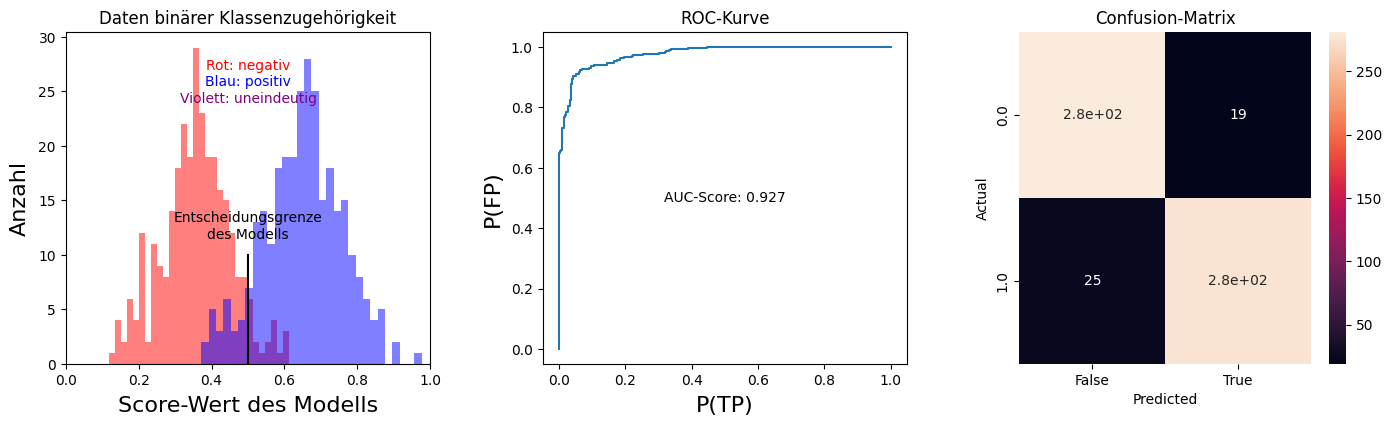

interactive(children=(FloatSlider(value=0.35, description='y_negativ', max=1.0, step=0.05), FloatSlider(value=…

<function __main__.hist_model(y_negativ, y_positiv)>

In [67]:
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn import metrics
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

n = 300
negative = np.random.normal(0, 0.1, n) #Gauss-Verteilung mit Mittelwert, Standardabweichung, Anzahl n Datenpunkte
positive = np.random.normal(0, 0.1, n) #Gauss-Verteilung mit Mittelwert, Standardabweichung, Anzahl n Datenpunkte

def hist_model(y_negativ, y_positiv):
    fig, axs = plt.subplots(1,3, figsize=(15, 5))
    fig.tight_layout(pad=5.0) #Abstand der Subplots
    #fig.suptitle('Titel')
    
    axs[0].set_title('Daten binärer Klassenzugehörigkeit')
    axs[0].set_xlim([0, 1])
    neg = negative+y_negativ
    pos = positive+y_positiv
    X = np.concatenate((neg, pos))
    y = np.concatenate(( np.zeros(n), np.ones(n) ))
    entscheidungsgrenze = (y_positiv + y_negativ) / 2
    y_pred = X >= entscheidungsgrenze
    axs[0].hist(neg, bins = (int)(n/10), color='red',  alpha = 0.5)
    axs[0].hist(pos, bins = (int)(n/10), color='blue', alpha = 0.5)
    axs[0].plot([entscheidungsgrenze,entscheidungsgrenze], [0,10], color='black')
    axs[0].text(entscheidungsgrenze, 0.44, 'Entscheidungsgrenze', color='black', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)
    axs[0].text(entscheidungsgrenze, 0.39, 'des Modells', color='black', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)

    axs[0].set_xlabel("Score-Wert des Modells", 
           #family='serif', 
           #color='r', 
           weight='normal', 
           size = 16,
           labelpad = 6)
    axs[0].set_ylabel("Anzahl", 
           #family='serif', 
           #color='r', 
           weight='normal', 
           size = 16,
           labelpad = 6)
    axs[0].text(0.5, 0.9, 'Rot: negativ', color='red', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)
    axs[0].text(0.5, 0.85, 'Blau: positiv', color='blue', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)
    axs[0].text(0.5, 0.8, 'Violett: uneindeutig', color='purple', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)

    axs[1].set_title('ROC-Kurve')   
    axs[1].set_xlabel("P(TP)", 
           #family='serif', 
           #color='r', 
           weight='normal', 
           size = 16,
           labelpad = 6)
    axs[1].set_ylabel("P(FP)", 
           #family='serif', 
           #color='r', 
           weight='normal', 
           size = 16,
           labelpad = 6)
    fpr, tpr, thresholds = metrics.roc_curve(y, X, pos_label=1)
    axs[1].plot(fpr, tpr)
    auc = roc_auc_score(y, y_pred)
    axs[1].text(0.5, 0.5, 'AUC-Score: {auc:.3f}'.format(auc=auc), horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes)

    axs[2].set_title('Confusion-Matrix')
    conf_mat = pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sn.heatmap(conf_mat, annot=True, ax=axs[2]) 
    
interact(hist_model, y_negativ = widgets.FloatSlider(value=0.35,
                                               min=0,
                                               max=1.0,
                                               step=0.05),
                    y_positiv = widgets.FloatSlider(value=0.65,
                                               min=0,
                                               max=1.0,
                                               step=0.05))